<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/06_01_simple_nn_hand_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Simple feed forward neural network -

import torch

# Input values
i1, i2 = 0.85, 0.25
x = torch.tensor([[i1, i2]], dtype=torch.float32)

# Target output
y_true = torch.tensor([[1.0, 0.0]], dtype=torch.float32)

# Learning rate
lr = 0.3

# Initialize weights and biases
W1 = torch.tensor([[0.1, 0.2, 0.3],
                   [0.4, 0.5, 0.6]], dtype=torch.float32, requires_grad=True)
b1 = torch.tensor([[0.0, 0.0, 0.0]], dtype=torch.float32, requires_grad=True)

W2 = torch.tensor([[0.25, 0.50],
                   [0.1, 0.2],
                   [0.3, 0.4]], dtype=torch.float32, requires_grad=True)
b2 = torch.tensor([[0.0, 0.0]], dtype=torch.float32, requires_grad=True)

# Save old weights
W1_old = W1.clone().detach()
b1_old = b1.clone().detach()
W2_old = W2.clone().detach()
b2_old = b2.clone().detach()

# Forward pass
z1 = x @ W1 + b1
a1 = torch.sigmoid(z1)
print("Hidden layer input (z1):", z1.detach().numpy())
print("Hidden layer output (a1):", a1.detach().numpy())

z2 = a1 @ W2 + b2
y_pred = torch.sigmoid(z2)
print("Output layer input (z2):", z2.detach().numpy())
print("****** Predicted output (y_pred):", y_pred.detach().numpy())

# Compute loss (mean squared error)
loss = torch.mean((y_true - y_pred) ** 2)
print("Loss:", loss.item())

# Backpropagation
loss.backward()

# Update weights
with torch.no_grad():
    W1 -= lr * W1.grad
    b1 -= lr * b1.grad
    W2 -= lr * W2.grad
    b2 -= lr * b2.grad

    # Clear gradients
    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()

# Print old vs new weights
print("\nW1 (old):\n", W1_old)
print("W1 (new):\n", W1)
print("\nb1 (old):\n", b1_old)
print("b1 (new):\n", b1)
print("\nW2 (old):\n", W2_old)
print("W2 (new):\n", W2)
print("\nb2 (old):\n", b2_old)
print("b2 (new):\n", b2)

Hidden layer input (z1): [[0.185      0.29500002 0.40500003]]
Hidden layer output (a1): [[0.54611856 0.5732198  0.5998884 ]]
Output layer input (z2): [[0.37381813 0.6276586 ]]
****** Predicted output (y_pred): [[0.59238124 0.65195835]]
Loss: 0.29560136795043945

W1 (old):
 tensor([[0.1000, 0.2000, 0.3000],
        [0.4000, 0.5000, 0.6000]])
W1 (new):
 tensor([[0.0969, 0.1988, 0.2982],
        [0.3991, 0.4996, 0.5995]], requires_grad=True)

b1 (old):
 tensor([[0., 0., 0.]])
b1 (new):
 tensor([[-0.0037, -0.0014, -0.0021]], requires_grad=True)

W2 (old):
 tensor([[0.2500, 0.5000],
        [0.1000, 0.2000],
        [0.3000, 0.4000]])
W2 (new):
 tensor([[0.2661, 0.4758],
        [0.1169, 0.1746],
        [0.3177, 0.3734]], requires_grad=True)

b2 (old):
 tensor([[0., 0.]])
b2 (new):
 tensor([[ 0.0295, -0.0444]], requires_grad=True)


In [18]:
import torch

# Input and target values
i1, i2 = 0.85, 0.25
x = torch.tensor([[i1, i2]], dtype=torch.float32)
y_true = torch.tensor([[1.0, 0.0]], dtype=torch.float32)

# Hyperparameters
lr = 0.3
epochs = 100  # Set your max epoch here

# Initialize weights and biases
W1 = torch.tensor([[0.1, 0.2, 0.3],
                   [0.4, 0.5, 0.6]], dtype=torch.float32, requires_grad=True)
b1 = torch.tensor([[0.0, 0.0, 0.0]], dtype=torch.float32, requires_grad=True)

W2 = torch.tensor([[0.25, 0.50],
                   [0.1, 0.2],
                   [0.3, 0.4]], dtype=torch.float32, requires_grad=True)
b2 = torch.tensor([[0.0, 0.0]], dtype=torch.float32, requires_grad=True)

# Training loop
for epoch in range(1, epochs + 1):
    # Forward pass
    z1 = x @ W1 + b1
    a1 = torch.sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_pred = torch.sigmoid(z2)

    # Compute loss (MSE)
    loss = torch.mean((y_true - y_pred) ** 2)

    # Backward pass
    loss.backward()

    # Update weights
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

        # Zero gradients
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()

# Print loss and weights
print(f"\nEpoch {epoch}")
print(f"Loss: {loss.item():.6f}")
print("W1:", W1.detach().numpy())
print("b1:", b1.detach().numpy())
print("W2:", W2.detach().numpy())
print("b2:", b2.detach().numpy())


#Epoch 1
#Loss: 0.295601
#W1: [[0.09688001 0.19876829 0.2981855 ]
# [0.39908236 0.49963772 0.5994663 ]]
#b1: [[-0.00367058 -0.00144907 -0.00213473]]
#W2: [[0.26612568 0.475763  ]
# [0.11692591 0.17456022]
# [0.31771338 0.37337667]]
#b2: [[ 0.02952779 -0.0443805 ]]

#Epoch 1000
#Loss: 0.000706
#W1: [[0.29042554 0.4756953  0.55998677]
# [0.4560075  0.58108747 0.6764671 ]]
#b1: [[0.2240301  0.32434672 0.30586705]]
#W2: [[ 1.0461038  -0.5845809 ]
# [ 0.96723795 -0.9785143 ]
# [ 1.1951308  -0.81789184]]
#b2: [[ 1.4025552 -1.9287049]]


Epoch 100
Loss: 0.011433
W1: [[0.14538784 0.30828398 0.3932172 ]
 [0.41334936 0.5318484  0.6274169 ]]
b1: [[0.05339744 0.12739286 0.10966715]]
W2: [[ 0.719263   -0.22163706]
 [ 0.6069395  -0.5784096 ]
 [ 0.8256101  -0.4075222 ]]
b2: [[ 0.8609663 -1.3266466]]


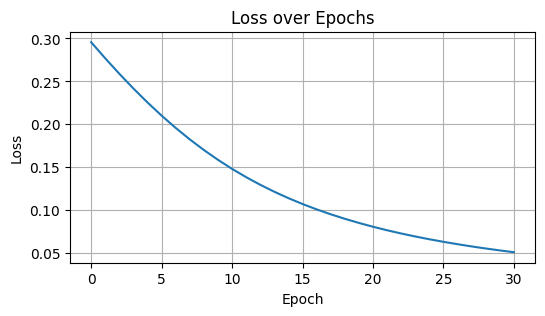


Epoch 30
Loss: 0.051164
W1: [[0.09223188 0.23406105 0.32155982]
 [0.39771518 0.51001793 0.606341  ]]
b1: [[-0.00913898  0.04007184  0.02536447]]
W2: [[ 0.5315141   0.02743662]
 [ 0.4010127  -0.30528265]
 [ 0.6132519  -0.12583748]]
b2: [[ 0.5221754  -0.87676066]]


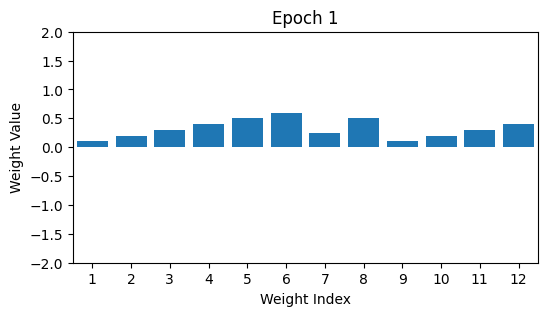

In [27]:
import torch
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Input and target values
x = torch.tensor([[0.85, 0.25]], dtype=torch.float32)
y_true = torch.tensor([[1.0, 0.0]], dtype=torch.float32)

# Hyperparameters
lr = 0.3
epochs = 31

# Initialize weights and biases
W1 = torch.tensor([[0.1, 0.2, 0.3],
                   [0.4, 0.5, 0.6]], dtype=torch.float32, requires_grad=True)
b1 = torch.zeros((1, 3), dtype=torch.float32, requires_grad=True)

W2 = torch.tensor([[0.25, 0.50],
                   [0.1, 0.2],
                   [0.3, 0.4]], dtype=torch.float32, requires_grad=True)
b2 = torch.zeros((1, 2), dtype=torch.float32, requires_grad=True)

# History for animation
loss_history = []
W1_vals = []
W2_vals = []

# Training loop
for epoch in range(epochs):
    z1 = x @ W1 + b1
    a1 = torch.sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_pred = torch.sigmoid(z2)

    loss = torch.mean((y_true - y_pred) ** 2)
    loss_history.append(loss.item())
    W1_vals.append(W1.detach().numpy().copy())
    W2_vals.append(W2.detach().numpy().copy())

    loss.backward()
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()

# Plot loss
plt.figure(figsize=(6, 3))
plt.plot(loss_history)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Print loss and weights
print(f"\nEpoch {epoch}")
print(f"Loss: {loss.item():.6f}")
print("W1:", W1.detach().numpy())
print("b1:", b1.detach().numpy())
print("W2:", W2.detach().numpy())
print("b2:", b2.detach().numpy())

# Animate weight changes
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Weight Evolution (W1 and W2)")
ax.set_ylim(-2, 2)
ax.set_xlim(0.5, 12.5)
ax.set_xticks(range(1, 13, 1))
ax.set_xlabel("Weight Index")
ax.set_ylabel("Weight Value")
bars = ax.bar(range(1, 13), [0]*12)

def animate(i):
    W1_flat = W1_vals[i].flatten()
    W2_flat = W2_vals[i].flatten()
    all_weights = np.concatenate([W1_flat, W2_flat])
    for bar, height in zip(bars, all_weights):
        bar.set_height(height)
    ax.set_title(f"Epoch {i+1}")

ani = animation.FuncAnimation(fig, animate, frames=epochs, repeat=False)
ani.save("nn_weight_updates.gif", writer="pillow", fps=15)
